In [1]:
# STEP 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# STEP 2: Load dataset
csv_path = "/content/Avian Influenza (HPAI).csv"
df = pd.read_csv(csv_path)

In [3]:
# STEP 3: Quick inspection
print("First 5 rows:")
print(df.head())
print("\nColumn info:")
print(df.info())


First 5 rows:
   _id          Scientific_Name            Common_Name                 Date  \
0    1  Acrocephalus scirpaceus  Eurasian Reed Warbler  2015-09-15T00:00:00   
1    2  Acrocephalus scirpaceus  Eurasian Reed Warbler  2015-09-15T00:00:00   
2    3        Limosa haemastica       Hudsonian Godwit  2015-09-15T00:00:00   
3    4        Limosa haemastica       Hudsonian Godwit  2015-09-15T00:00:00   
4    5        Limosa haemastica       Hudsonian Godwit  2015-09-15T00:00:00   

   Year  Month  Day  Time  Country Country_State_County      State  County  \
0  2015      9   15  1100  Ireland              IE-C-GY  Connaught  Galway   
1  2015      9   15  1100  Ireland              IE-C-GY  Connaught  Galway   
2  2015      9   15  1100  Ireland              IE-C-GY  Connaught  Galway   
3  2015      9   15  1100  Ireland              IE-C-GY  Connaught  Galway   
4  2015      9   15  1100  Ireland              IE-C-GY  Connaught  Galway   

               Locality  Latitude  Longitu

In [4]:
# STEP 4: Handle missing values (optional: drop or fill)
df = df.dropna()  # OR: df.fillna(method='ffill', inplace=True)


In [5]:
# STEP 5: Encode categorical features
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])


In [7]:
# STEP 6: Separate features and label
X = df.drop('target_H5_HPAI', axis=1)
y = df['target_H5_HPAI']


In [8]:
df = df.drop(columns=['_id', 'Date', 'Time', 'Scientific_Name', 'Common_Name', 'Locality', 'Country_State_County'])


In [9]:
X = df.drop('target_H5_HPAI', axis=1)
y = df['target_H5_HPAI']


In [10]:
# Encode categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Split features and target
X = df.drop('target_H5_HPAI', axis=1)
y = df['target_H5_HPAI']

In [11]:
print(y.value_counts())


target_H5_HPAI
0    13601
1     2574
Name: count, dtype: int64


In [12]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight='balanced', random_state=42)


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd

# Load dataset
df = pd.read_csv("/content/Avian Influenza (HPAI).csv")

# Drop irrelevant columns
df = df.drop(columns=['_id', 'Date', 'Time', 'Scientific_Name', 'Common_Name', 'Locality', 'Country_State_County'])

# Label encode categorical features
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Split data
X = df.drop('target_H5_HPAI', axis=1)
y = df['target_H5_HPAI']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Random Forest with class weights
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[2730   14]
 [  78  439]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      2744
           1       0.97      0.85      0.91       517

    accuracy                           0.97      3261
   macro avg       0.97      0.92      0.94      3261
weighted avg       0.97      0.97      0.97      3261

Accuracy: 0.9717877951548605


In [14]:
# Step 1: Install XGBoost & Load Data
!pip install xgboost imbalanced-learn

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

In [16]:
# Step 2: Load and clean data
df = pd.read_csv("/content/Avian Influenza (HPAI).csv")
df = df.drop(columns=['_id', 'Date', 'Time', 'Scientific_Name', 'Common_Name', 'Locality', 'Country_State_County'])


In [17]:
# Encode categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [18]:

# Step 3: Feature and target split
X = df.drop('target_H5_HPAI', axis=1)
y = df['target_H5_HPAI']


In [19]:
# Step 4: Oversample minority class with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [20]:
# Step 5: Train-Test Split & Scaling
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
# Step 6: Train XGBoost
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:33:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [22]:
# Step 7: Evaluation
y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[2718   26]
 [  10 2734]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      2744
           1       0.99      1.00      0.99      2744

    accuracy                           0.99      5488
   macro avg       0.99      0.99      0.99      5488
weighted avg       0.99      0.99      0.99      5488

Accuracy: 0.9934402332361516


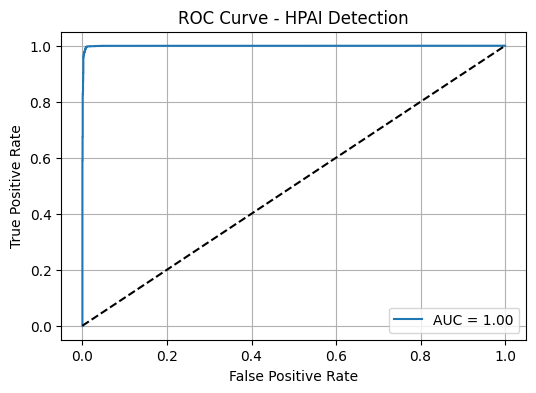

In [23]:
# Step 8: ROC Curve
y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - HPAI Detection")
plt.legend()
plt.grid()
plt.show()


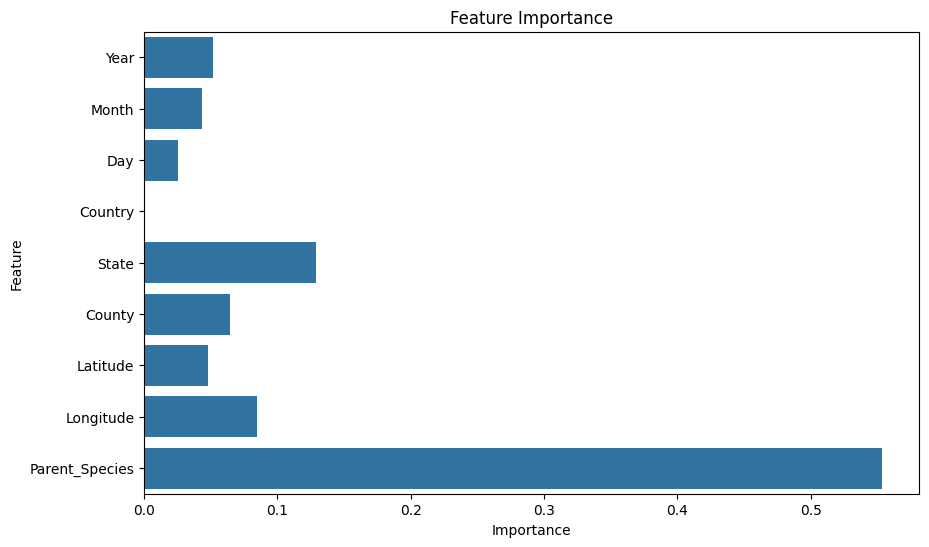

In [24]:
# Step 9: Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

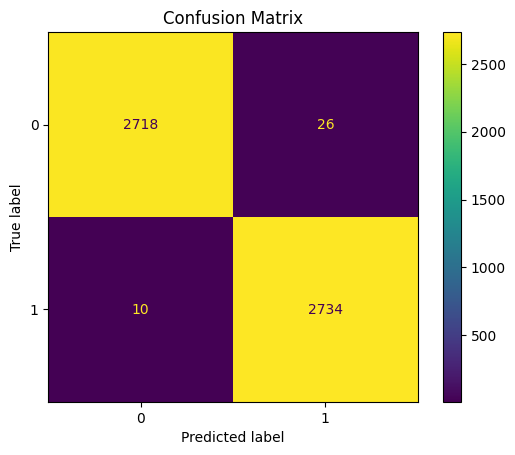

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()


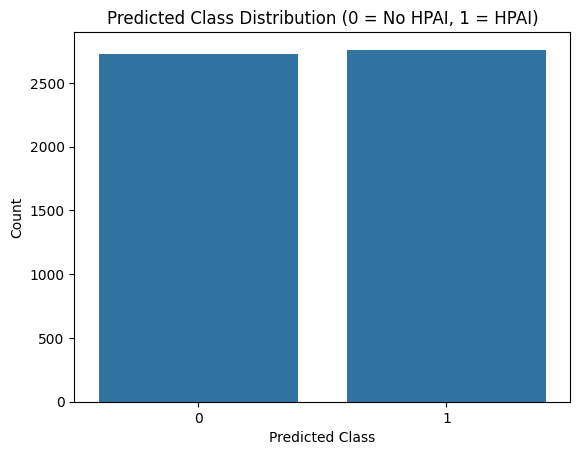

In [26]:
sns.countplot(x=y_pred)
plt.title("Predicted Class Distribution (0 = No HPAI, 1 = HPAI)")
plt.xlabel("Predicted Class")
plt.ylabel("Count")
plt.show()


In [27]:
plt.savefig("roc_curve.png", dpi=300)
plt.savefig("feature_importance.png", dpi=300)
plt.savefig("confusion_matrix.png", dpi=300)


<Figure size 640x480 with 0 Axes>